# Preprocessing

In [1]:
import pickle
import os

In [2]:
# load the data
data_filename = 'ondrejov-halpha-labeled-resampled.pickle'
with open(os.path.join('data', data_filename), 'rb') as f:
    spectra = pickle.load(f)

In [3]:
import numpy as np

In [4]:
ids_list = []
X_list = []
y_list = []
for spectrum, data in spectra.items():
    ids_list.append([spectrum])
    X_list.append(data['resampled_flux'])
    y_list.append([data['label']])
    
X = np.array(X_list)
ids = np.array(ids_list)
y = np.array(y_list)
ids.shape, X.shape, y.shape

((13208, 1), (13208, 4000), (13208, 1))

## PCA

In [5]:
import sklearn.decomposition
import matplotlib.pyplot as plt
%matplotlib inline

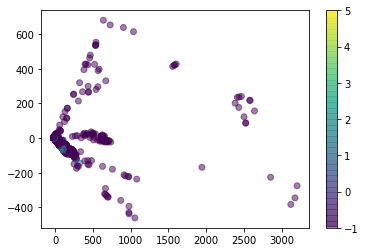

In [6]:
pca = sklearn.decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
_ = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    alpha=0.5,
    c=y,
    #s=y + 1, # hide unlabeled set point size to -1 + 1 = 0
)
_ = plt.colorbar()

In [7]:
import sklearn.preprocessing

In [8]:
X_scaled = sklearn.preprocessing.scale(X)

In [9]:
import random

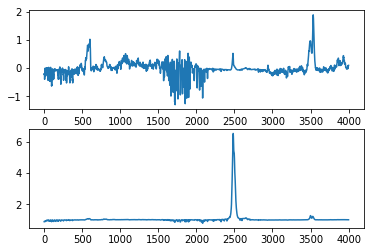

In [10]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_scaled[idx])
_ = ax2.plot(X[idx])

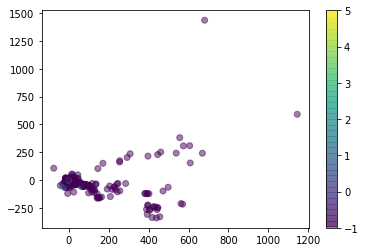

In [11]:
scaled_pca = sklearn.decomposition.PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)
_ = plt.scatter(
    X_scaled_pca[:, 0],
    X_scaled_pca[:, 1],
    alpha=0.5,
    c=y,
)
_ = plt.colorbar()

In [12]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

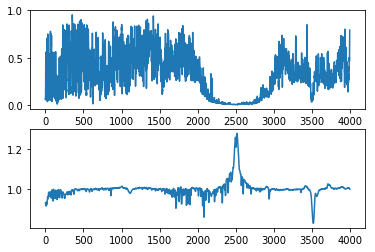

In [13]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_minmax[idx])
_ = ax2.plot(X[idx])

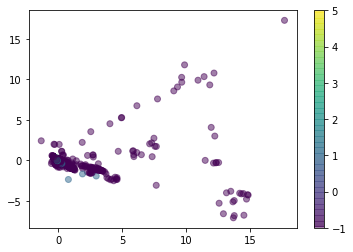

In [14]:
minmax_pca = sklearn.decomposition.PCA(n_components=2)
X_minmax_pca = pca.fit_transform(X_minmax)
_ = plt.scatter(
    X_minmax_pca[:, 0],
    X_minmax_pca[:, 1],
    alpha=0.5,
    c=y,
)
_ = plt.colorbar()

In [15]:
X_normalized = sklearn.preprocessing.normalize(X, norm='l1')

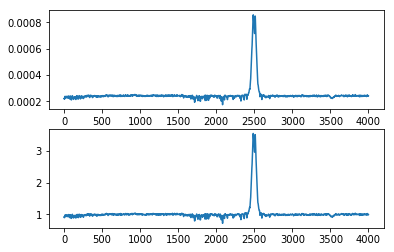

In [16]:
idx = random.randrange(X.shape[1])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_normalized[idx])
_ = ax2.plot(X[idx])

In [17]:
X_normalized.mean(axis=0), X_normalized.std(axis=0)

(array([ 0.00022974,  0.00022918,  0.00022863, ...,  0.00024574,
         0.00024569,  0.00024567]),
 array([  4.27594267e-05,   4.57175998e-05,   4.71261796e-05, ...,
          2.54314935e-05,   2.55701698e-05,   2.55279727e-05]))

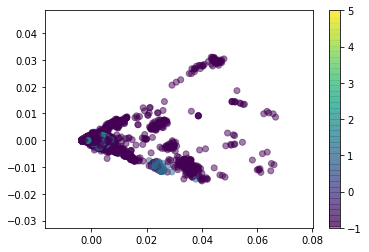

In [18]:
normalized_pca = sklearn.decomposition.PCA(n_components=2)
X_normalized_pca = pca.fit_transform(X_normalized)
_ = plt.scatter(
    X_normalized_pca[:, 0],
    X_normalized_pca[:, 1],
    alpha=0.5,
    c=y
)
_ = plt.colorbar()

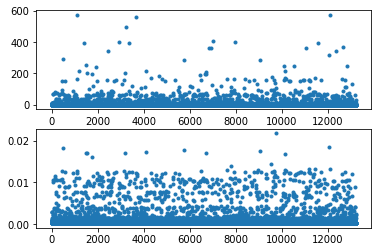

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X.max(axis=1), '.')
_ = ax2.plot(X_normalized.max(axis=1), '.')

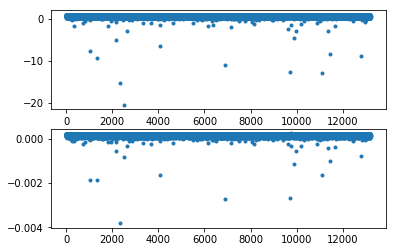

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X.min(axis=1), '.')
_ = ax2.plot(X_normalized.min(axis=1), '.')

## Division by Absolute Maximum

Subtract 1 because normalized spectrum is rectified to 1.
Then divide by abosolute maximum to scale in range [-1, 1].
This transformation discarts intensities, is linear and
does not affect shape.

In [21]:
X_foo = (X - 1) / np.absolute(X - 1).max(axis=1).reshape(X.shape[0], 1)

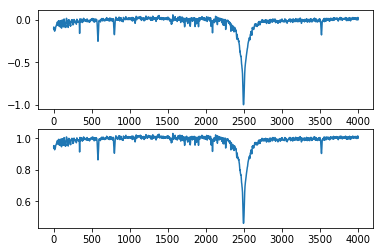

In [22]:
idx = random.randrange(X.shape[0])
f, (ax1, ax2) = plt.subplots(2, 1)
_ = ax1.plot(X_foo[idx])
_ = ax2.plot(X[idx])

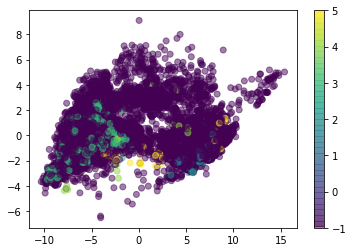

In [23]:
foo_pca = sklearn.decomposition.PCA(n_components=2)
X_foo_pca = pca.fit_transform(X_foo)
_ = plt.scatter(
    X_foo_pca[:, 0],
    X_foo_pca[:, 1],
    alpha=0.5,
    c=y
)
_ = plt.colorbar()